In [1]:
from perceptron_layer import MLP_layer
from activation_functions import Sigmoid, Softmax, CCELoss
from mulit_layer_perceptron import MLP


In [2]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import random

## Load and process MNIST data

In [3]:
# self made functions

def one_hot_digits(targets):
    targets_hot = np.zeros((targets.shape[0],10))
    for t, t_hot in zip(targets, targets_hot):
        t_hot[t] = 1
    return targets_hot

def rescale(array, new_min, new_max):
    minimum, maximum = np.min(array), np.max(array)
    m = (new_max - new_min) / (maximum - minimum)
    b = new_min - m * minimum
    return m * array + b

def shuffle(X, Y_head):
    random_index = random.sample(range(len(X)), len(X))
    X_shuffled = X[random_index,:]
    Y_head_shuffled = Y_head[random_index,:]
    return X_shuffled, Y_head_shuffled

def minibatches(X, Y_head, batch_size):
    num_batches = int(len(X)/batch_size)
    if len(X)%batch_size != 0:
        num_batches = num_batches + 1
    X_minibatches=[]
    Y_head_minibatches=[]
    for i in range(num_batches):
        index = np.array(range(len(X)))
        mask = list(index % num_batches == i)
        X_minibatches.append(np.array(X[mask]))
        Y_head_minibatches.append(np.array(Y_head[mask]))
    return X_minibatches, Y_head_minibatches
    

def display_digit(image, target):
    image= np.reshape(image,(8,8))
    plt.imshow(image, cmap='gray')
    print(target)
    plt.show()

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


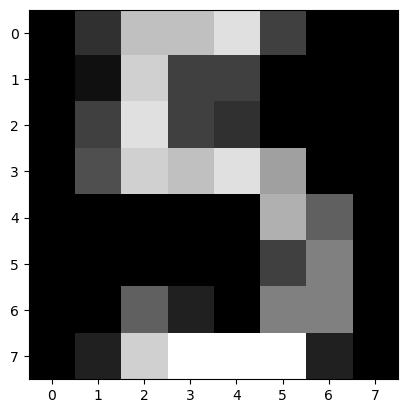

In [4]:
# load and process data
X, Y_head = load_digits(return_X_y=True)
X = rescale(X, 0, 1)
Y_head = one_hot_digits(Y_head)
X, Y_head = shuffle(X,Y_head)
X_batches, Y_head_batches = minibatches(X,Y_head, 10)
display_digit(X_batches[0][0], Y_head_batches[0][0])

## building and training a MLP

In [5]:
# build Perspetron
mlp = MLP(n_layers=3, n_units_per_layer=[13,13,10], input_size=64)

# train perceptron (later a function inside MLP)
mlp.training(X_batches, Y_head_batches, epochs=2, learning_rate=0.001, loss_func=CCELoss())

input_softmax: [[-0.02712543  0.21585107  0.23180373 -0.17184624 -0.03116943  0.22658158
   0.17033493 -0.23861869 -0.35217474  0.41579636]
 [-0.01089393  0.21798649  0.22315    -0.18065244 -0.0201849   0.21360253
   0.17756131 -0.21064669 -0.34541933  0.37924904]
 [-0.01298239  0.22128055  0.23075065 -0.17654354 -0.03014818  0.21840851
   0.17176281 -0.21473157 -0.33565757  0.38249739]
 [-0.01658629  0.20655017  0.24452818 -0.16777001 -0.05116145  0.23279527
   0.16980683 -0.21878125 -0.3395504   0.40630176]
 [-0.01684398  0.21006433  0.2348573  -0.16694125 -0.04760266  0.24767509
   0.1657112  -0.22126199 -0.35221445  0.41313858]
 [-0.01823226  0.21165075  0.23527775 -0.16915007 -0.05463938  0.24788132
   0.16505236 -0.22915257 -0.34617506  0.41505789]
 [-0.0149394   0.20179392  0.24342186 -0.17857341 -0.03303855  0.21626486
   0.17724237 -0.20906692 -0.34723742  0.38962999]
 [-0.0114693   0.20272619  0.24326323 -0.17329575 -0.05120639  0.2237428
   0.16925451 -0.21242445 -0.33926944

C:\Users\erna\Uni Jupyter Kram\Tensorflow_homeworks\homework_01\activation_functions.py:16: RuntimeWarning: overflow encountered in exp
  result = np.exp(z) / np.sum(np.exp(z), axis=1)
C:\Users\erna\Uni Jupyter Kram\Tensorflow_homeworks\homework_01\activation_functions.py:16: RuntimeWarning: invalid value encountered in divide
  result = np.exp(z) / np.sum(np.exp(z), axis=1)


input_softmax: [[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
output_softmax: [[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
input_softmax: [[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan 

ValueError: operands could not be broadcast together with shapes (9,10) (9,) 